# Valuación de opciones asiáticas 

- Las opciones que tratamos la clase pasada dependen sólo del valor del precio del subyacente $S_t$, en el instante que se ejerce.

- Cambios bruscos en el precio, cambian que la opción esté *in the money* a estar *out the money*.

- **Posibilidad de evitar esto** $\longrightarrow$ suscribir un contrato sobre el valor promedio del precio del subyacente. 

- <font color ='red'> Puede proveer protección contra fluctuaciones extremas del precio en mercados volátiles. </font>

- **Nombre**: Banco Trust de Tokio ofreció este tipo de opciones

### ¿Dónde se negocian?

- Mercados OTC (Over the Counter / Independientes). Una explicación de esto podría ser el último punto de la lámina anterior.

- Las condiciones para el cálculo matemático del promedio y otras condiciones son especificadas en el contrato. Lo que las hace un poco más “personalizables”. 

Existen diversos tipos de opciones asiáticas y se clasiflcan de acuerdo con lo siguiente.

1. La media que se utiliza puede ser **aritmética** o geométrica.

2. Media se calcula para $S_t \longrightarrow$ "Precio de ejercicio fijo". Media se calcula para precio de ejercicio $\longrightarrow$ "Precio de ejercicio flotante". 

3. Si la opción sólo se puede ejercer al final del tiempo del contrato se dice que es asiática de tipo europeo o **euroasiática**, y si puede ejercer en cualquier instante, durante la vigencia del contrato se denomina **asiática de tipo americano.**

Los tipos de opciones euroasiáticas son:

- Call con precio de ejercicio fijo, función de pago: $\max\{A-K,0\}$.
- Put con precio de ejercicio fijo, función de pago: $\max\{K-A,0\}$.
- Call con precio de ejercicio flotante, función de pago: $\max\{S-K,0\}$.
- Put con precio de ejercicio flotante, función de pago: $\max\{K-S,0\}$.

Donde $A$ es el promedio del precio del subyacente.

$$\text{Promedio aritmético} \quad A={1\over T} \int_0^TS_tdt$$
$$\text{Promedio geométrico} \quad A=\exp\Big({1\over T} \int_0^T Ln(S_t) dt\Big)$$

De aquí en adelante denominaremos **Asiática ** $\longrightarrow$ Euroasiática y se analizará el call asiático con **K Fijo**.

Se supondrá un solo activo con riesgo, cuyos proceso de precios $\{S_t | t\in [0,T]\}$ satisface un movimiento browniano geométrico, en un mercado que satisface las suposiciones del modelo de Black y Scholes. Recordemos que bajo esta medida de probabilidad, $P^*$, denominada de riesgo neutro, bajo la cual el precio del activo, $S_t$, satisface:

$$dS_t = rS_tdt+\sigma S_tdW_t,\quad 0\leq t \leq T, S_0 >0$$

Para un call asiático de promedio aritmético y con precio de ejercicios fijo, está dado por
$$\max \{A(T)-K,0\} = (A(T)-K)_+$$

con $A(x)={1\over x} \int_0^x S_u du$

Se puede ver que el valor en el tiempo t de la opción call asiática está dado por:

$$ V_t(K) = e^{-r(T-t)}E^*[(A(T)-K)_+]$$

Para el caso de interés, *Valución de la opción*, donde $t_0=0$ y $t=0$, se tiene:

$$\textbf{Valor call asiático}\longrightarrow V_0(K)=e^{-rT}E\Bigg[ \Big({1\over T} \int_0^T S_u du -K\Big)_+\Bigg]$$ 

## Usando Monte Carlo

Para usar este método es necesario que se calcule el promedio $S_u$ en el intervalo $[0,T]$. Para esto se debe aproximar el valor de la integral por los siguiente dos métodos.

Para los dos esquemas se dividirá el intervalo $[0,T]$ en N subintervalos de igual longitud, $h={T\over N}$, esto determina los tiempos $t_0,t_1,\cdots,t_{N-1},t_N $, en donde $t_i=ih$ para $i=0,1,\cdots,N$

### Sumas de Riemann

$$\int_0^T S_u du \approx h \sum_{i=0}^{n-1} S_{t_i}$$

Reemplanzando esta aproximación en el valor del call asiático obtenemos la siguiente aproximación:

$$\hat V_0^{(1)}= {e^{-rT} \over M} \sum_{j=1}^{M} \Bigg({1\over N} \sum_{i=0}^{N-1} S_{t_i}-K \Bigg)_+$$


## Mejorando la aproximación de las sumas de Riemann

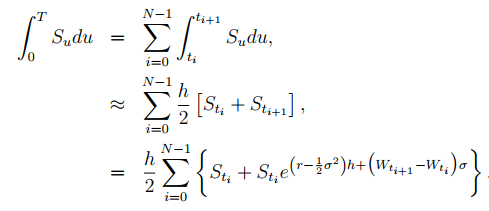

Desarrollando la exponencial en serie de taylor y suponiendo que $h$ es pequeña, sólo se conservan los términos de orden uno, se tiene la siguiente aproximación:
$$\int_0^T S_u du \approx {h \over 2}\sum_{i=0}^{N-1}S_{t_i}(2+rh+(W_{t_{i+1}}-W_{t_i})\sigma)$$

Reemplazando esta aproximación en el precio del call, se tiene la siguiente estimación:
$$\hat V_0^{(2)}= {e^{-rT} \over M} \sum_{j=1}^{M} \Bigg({h\over 2T} \sum_{i=0}^{N-1} S_{t_i}(2+rh+(W_{t_{i+1}}-W_{t_i})\sigma)-K \Bigg)_+$$

## Ejemplo

Como caso de prueba se seleccionó el de un call asiático con precio inicial, $S_0 = 100$, precio de ejercicio $K = 100$, tasa libre de riesgo $r = 0.10$, volatilidad $\sigma = 0.20$ y $T = 1$ año. Cuyo precio es $\approx 7.04$.

In [2]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [1]:
def BSprices(mu,sigma,S0,NbTraj,NbStep):
    T = 1
    nu = mu-(sigma**2)/2
    
    DeltaT = T/NbStep
    SqDeltaT = np.sqrt(DeltaT)
    
    #for i in range(NbStep):
    DeltaW = SqDeltaT*np.random.randn(NbTraj,NbStep)
    increments = nu*DeltaT + sigma*DeltaW
    concat = np.concatenate((np.log(S0)*np.ones([NbTraj,1]),increments),axis=1)
    LogSt = np.cumsum(concat,axis=1)
    St = np.exp(LogSt)
    t = np.arange(0,1+DeltaT,DeltaT)

    return St,t

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

,0
0.000,100.000
0.001,99.747
0.002,99.073
0.003,98.483
0.004,98.119
...,...
0.996,104.912
0.997,104.189
0.998,104.362
0.999,103.602


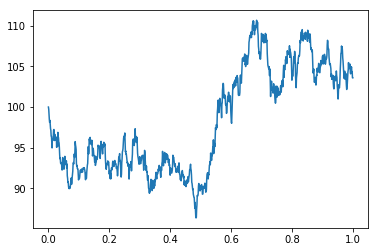

In [4]:
NbTraj = 1
NbStep = 1000
S0 = 100
mu = 0.10
sigma = 0.2

St,t = BSprices(mu,sigma,S0,NbTraj,NbStep)
plt.plot(t,St.T)

prices = pd.DataFrame(St.T,index=t)
#f = np.log(St[0:-1]/St[1:])
#plt.plot(t[1:],f)
prices

In [ ]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)


def BSprices(mu,sigma,S0,NbTraj,NbStep):
    T = 1
    nu = mu-(sigma**2)/2
    
    DeltaT = T/NbStep
    SqDeltaT = np.sqrt(DeltaT)
    
    #for i in range(NbStep):
    DeltaW = SqDeltaT*np.random.randn(NbTraj,NbStep)
    increments = nu*DeltaT + sigma*DeltaW
    concat = np.concatenate((np.log(S0)*np.ones([NbTraj,1]),increments),axis=1)
    LogSt = np.cumsum(concat,axis=1)
    St = np.exp(LogSt)
    t = np.arange(0,1+DeltaT,DeltaT)

    return St,t

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]
    
NbTraj = 100
NbStep = 360
S0 = 100
r = 0.10
sigma = 0.2
K = 100
T = 1

St,t = BSprices(r,sigma,S0,NbTraj,NbStep)
#t = t*360
#plt.plot(t,St.T)
#plt.show()

prices = pd.DataFrame(St.T,index=t)

Average_t = prices.expanding().mean()
#plt.plot(t,Average_t)
plt.show()#

#### Sumas de Riemann
strike = pd.DataFrame(K*np.ones([NbStep+1,NbTraj]), index=t)
call = pd.DataFrame({'Prima':np.exp(-r*T) \
             *np.fmax(Average_t-strike,np.zeros([NbStep+1,NbTraj])).mean(axis=1)}, index=t)
call.plot()
call.iloc[-1]
# .mean(axis=1) realiza el promedio entre las filas de np.fmax()

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Z.
</footer>